<a href="https://colab.research.google.com/github/Rezwan66/forecasting-accident-statistics/blob/main/ai_eng_challenge_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2209_verkehrsunfaelle.csv'
data = pd.read_csv(df)

# Let us take a look at a few rows of the dataset
print(data.head(15))

In [3]:
# Let us look at the relevant columns
columns = list(data.columns)
print(columns)

['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT', 'VERÄND_VORMONAT_PROZENT', 'VERÄND_VORJAHRESMONAT_PROZENT', 'ZWÖLF_MONATE_MITTELWERT']


In [4]:
# New datadrame with only the five selected columns
df_sp = data.iloc[:, 0:5].copy()
print(df_sp.head())

       MONATSZAHL AUSPRÄGUNG  JAHR   MONAT  WERT
0  Alkoholunfälle  insgesamt  2022  202201   NaN
1  Alkoholunfälle  insgesamt  2022  202202   NaN
2  Alkoholunfälle  insgesamt  2022  202203   NaN
3  Alkoholunfälle  insgesamt  2022  202204   NaN
4  Alkoholunfälle  insgesamt  2022  202205   NaN


In [5]:
list(df_sp.columns)

['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT', 'WERT']

In [ ]:
# Now we want to drop the data after 2020 to preprocess the dataset for developing the prediction model

# To filter out records after 2020
df_sp_y = df_sp[df_sp['JAHR']<=2020]
print(df_sp_y)

# Looking for null values if present
print(df_sp_y.isnull().sum())

In [ ]:
# Filter for a specific Category
category = 'Alkoholunfälle'
#filtered_data = aggr_data[aggr_data['MONATSZAHL'] == category]
filtered_data = df_sp_y[(df_sp_y['MONATSZAHL'] == category) & (df_sp_y['AUSPRÄGUNG'] == 'insgesamt')]

# Group by Category and Year, and sum the Values
grouped_data = filtered_data.groupby(['MONATSZAHL', 'JAHR'])

# Sum of Values of the grouped data
aggr_data = grouped_data['WERT'].sum().reset_index()

print(aggr_data)

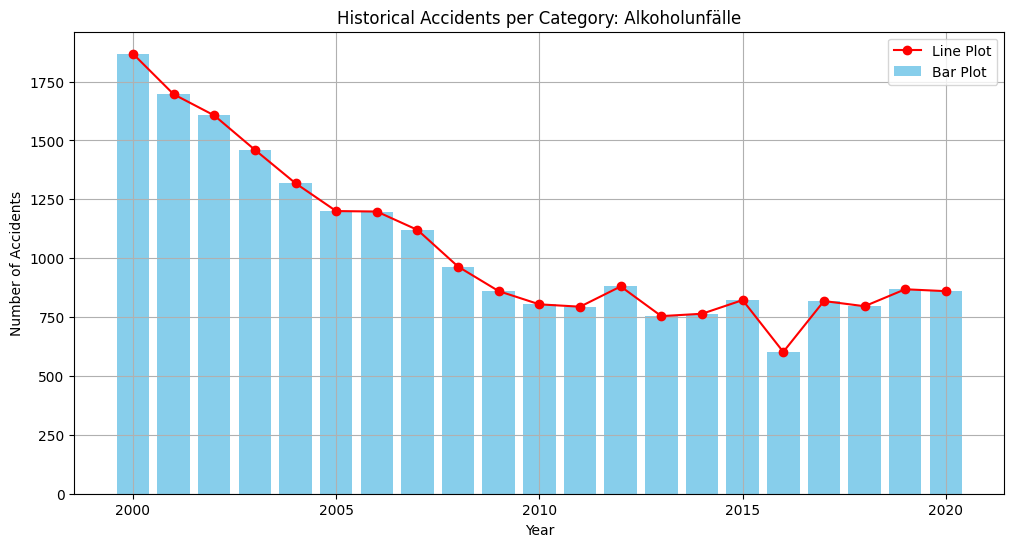

In [8]:
# Visualizing the data
plt.figure(figsize=(12, 6))

# Bar Plot
plt.bar(aggr_data['JAHR'], aggr_data['WERT'], color='skyblue', label='Bar Plot')

# Line Plot
plt.plot(aggr_data['JAHR'], aggr_data['WERT'], color='red', marker='o', label='Line Plot')

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title(f'Historical Accidents per Category: {category}')
plt.legend(loc='upper right')

plt.grid(True)
plt.show()

The plot shows a downward trend in the number of accidents over the years.

Let us use the SARIMA model to forecast the number of accidents for the category 'Alkoholunfälle' and type 'insgesamt' for the year 2021 and month 01.

In [11]:
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.8 MB/s eta 0:00:00


In [12]:
#Prepare the training and test set
training = filtered_data[['JAHR', 'MONATSZAHL', 'WERT']].copy()


In [13]:

# SARIMA Model
# Train the SARIMA model
model = auto_arima(training['WERT'], m=12)

In [15]:
# Forecast for 2021-01
forecast = model.predict(n_periods=1)

print(f"Forecasted number of accidents for Alkoholunfälle (insgesamt) in 2021-01: {forecast}")

Forecasted number of accidents for Alkoholunfälle (insgesamt) in 2021-01: 273    138.149908
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


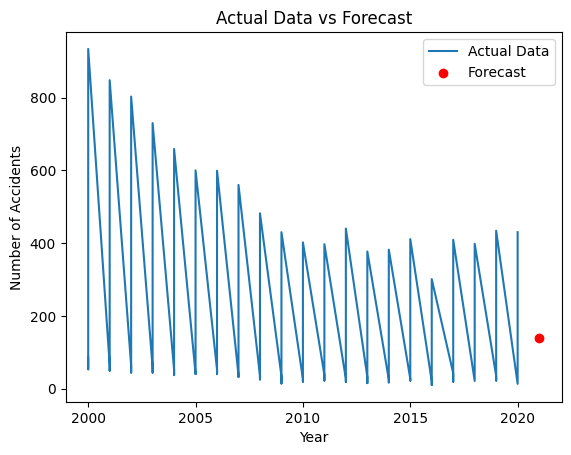

In [16]:
# Plotting the 'filtered_data'
plt.plot(filtered_data['JAHR'], filtered_data['WERT'], label='Actual Data')

# Adding a marker for the forecasted value
plt.scatter(2021, forecast, color='red', label='Forecast')

# Setting plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Actual Data vs Forecast')

# Displaying a legend
plt.legend()

# Showing the plot
plt.show()

In [17]:
# Filter the 'filtered_data' DataFrame for the date 2021-01
actual_value = df_sp.loc[(df_sp['JAHR'] == 2021) & (df_sp['MONAT'] == '202101')]

print(f"Actual value on 2021-01: {actual_value}")

Actual value on 2021-01:            MONATSZAHL              AUSPRÄGUNG  JAHR   MONAT    WERT
13     Alkoholunfälle               insgesamt  2021  202101    16.0
311    Alkoholunfälle  Verletzte und Getötete  2021  202101     5.0
609     Fluchtunfälle               insgesamt  2021  202101   521.0
907     Fluchtunfälle  Verletzte und Getötete  2021  202101     8.0
1205  Verkehrsunfälle               insgesamt  2021  202101  2153.0
1503  Verkehrsunfälle     mit Personenschäden  2021  202101   157.0
1801  Verkehrsunfälle  Verletzte und Getötete  2021  202101   177.0


In [19]:

# Convert the forecasted value to a numpy array
forecast_value = np.array(forecast)

# Extract the forecasted value for the specific date (e.g., 2021-01)
forecasted_value_on_date = forecast_value[0]

# Define the actual value
actual_value = 16.0

# Calculate the RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error([actual_value], [forecasted_value_on_date]))

print(f"RMSE between the forecasted value and the actual value: {rmse}")

RMSE between the forecasted value and the actual value: 122.14990763332787
